## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [213]:
! git clone https://www.github.com/DS3001/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


In [214]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
from sklearn.cluster import KMeans

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [215]:
# 1
df = pd.read_csv("assignment3/data/car_data.csv")
print("Dimensions:",df.shape)
display(df)

Dimensions: (1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [216]:
# 2
df.describe()
# There are no missing values in these 4 columns because they all have 1000 values
# which is the same number of rows in the whole database

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [217]:
# 2
print(df["Gender"].unique())
# There are no missing values here because there are only two unique values, "Male" and "Female"
# There are no missing values in the whole dataframe

['Male' 'Female']


In [218]:
# 2
# Mapping Female to 1 and Male to 0
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
print(df["Gender"].unique())

[0 1]


In [219]:
# 2
y = df['Purchased']
X = df.loc[:,['Age','AnnualSalary']]

In [220]:
# 3
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
X = X.apply(maxmin)
print(X)

          Age  AnnualSalary
0    0.377778      0.036364
1    0.488889      0.207273
2    0.688889      0.429091
3    0.488889      0.672727
4    0.155556      0.465455
..        ...           ...
995  0.444444      0.320000
996  0.644444      0.061818
997  0.222222      0.898182
998  0.666667      0.865455
999  0.577778      0.425455

[1000 rows x 2 columns]


In [221]:
# 4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =100)

In [222]:
# 5
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE
SSE = SSE_test
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal K value: ", k_star)

Optimal K value:  [9]


In [223]:
# 6
model = kNNClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
pd.crosstab(y_test, y_hat)

# The model predicts a sale when one fails to occur 15 out of a total of 200 values. The model predicts a no sale when one does occur 3 times.
# Overall, the model is very accurate. Most of the values are correct. The total error rate is only 18/200 = 9%
# I would say this model provides accurate predictions

col_0,0,1
Purchased,,
0,104,15
1,3,78


In [224]:
# 7
X = df.loc[:,['Age','AnnualSalary','Gender']]
X = X.apply(maxmin)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

model = kNNClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 0]
y_hat_F = y_hat[ X_test['Gender'] == 1]
y_M = y_test[ X_test['Gender'] == 0]
y_F = y_test[ X_test['Gender'] == 1]

pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,49,3
1,3,40


In [225]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,55,12
1,0,38


In [226]:
# The first table is for the men and it has an error rate of 6%. The second table is for women, and it has an error rate
# of 11%. This shows that this model is more accurate for men than women. I do think it is intersting to point out that
# for women, the model never predicted no sale when a sale did occur. On the other side, all 12 errors were when the model
# predicted a sale but it did not happen.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [227]:
#1
df = pd.read_csv("./assignment3/data/USA_cars_datasets.csv")
df = df.loc[:,['price','year', 'mileage']]
print(df.describe())
print(df.shape)
# No missing values in the lot column becuase the count = number of rows for each column

              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06
(2499, 3)


In [228]:
# 1
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [229]:
# 1
df['price'].unique()
# All the values in price are numbers with no weird formatting
# There is a zero value, but without context I assume this meant the car was
# maybe sold for free, like a parent giving a car (changing the deed) to thier child

array([ 6300,  2899,  5350, 25000, 27700,  5700,  7300, 13350, 14600,
        5250, 10400, 12920, 31900,  5430, 20700, 12710,  5200, 16500,
        5210, 38100, 12520, 15000,  6180, 20800, 11900, 21500, 12000,
        4190, 13000, 18500, 29800,  5330, 16600, 19200,  7320,  7000,
       30500,  6330, 55000, 16200, 19000,  5580, 54000, 16000, 27000,
        7760, 19600, 20000, 18100, 23000, 13490, 17800,  6650, 29100,
       21100, 18600,  4340, 19300, 12780, 15800, 29400,  4430, 19400,
       15900, 26400,  4140, 18300, 17900,  4640, 24000, 13200, 18000,
       14900, 11500,  9110,  7350, 24500,  9300, 39800, 53500, 15110,
       34000, 26502,  5990, 13600, 23605, 10780, 13800, 25201,  7070,
        8700, 18003,  8530, 23100, 17000, 34002,  6980, 20802,  9200,
       26500, 24802, 28500, 47500, 23500, 23505, 10940, 32100, 53000,
        6830, 26414,  4160, 19405,  5690, 25900, 24005,  5090, 19500,
       32012,  6800,  4260,     0, 31802,  7210, 28402, 33300,  6700,
        6440, 19900,

In [230]:
# 1
df['year'].unique()
# No weird values here and they are all numbers

array([2008, 2011, 2018, 2014, 2010, 2017, 2009, 2013, 2015, 2020, 2016,
       1973, 2003, 2019, 2002, 2000, 2001, 2005, 2012, 2006, 2007, 1998,
       2004, 1994, 1997, 1996, 1999, 1984, 1995, 1993])

In [231]:
# 1
null_count = df['mileage'].isnull().sum()
nan_count = df['mileage'].isna().sum()
print(null_count)
print(nan_count)
# No missing values in the mileage column

0
0


In [232]:
# 2
X = df.loc[:,['year', 'mileage']]
X =X.apply(maxmin)

In [233]:
# 2
y = df["price"]

In [234]:
# 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [235]:
# 3
print(X_train.shape)
print(X_test.shape)

(1999, 2)
(500, 2)


63223286609.11111


<Axes: xlabel='Test value', ylabel='Predicted value'>

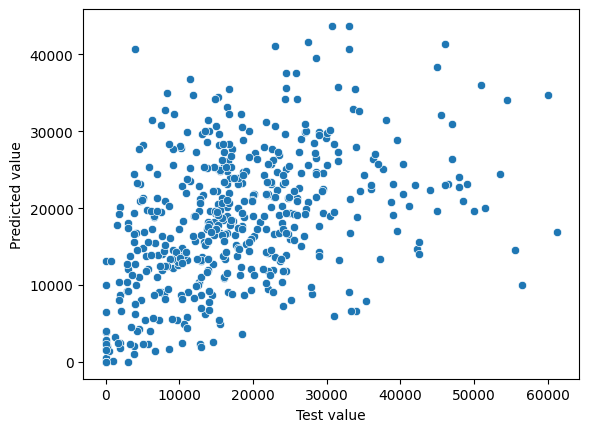

In [236]:
# 4
model = kNNRegression(n_neighbors=3)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)
graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

55401092793.409996


<Axes: xlabel='Test value', ylabel='Predicted value'>

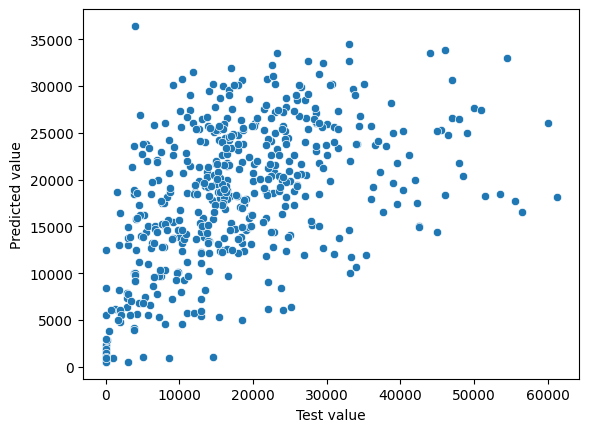

In [237]:
# 4
model = kNNRegression(n_neighbors=10)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)
graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

51585228924.304


<Axes: xlabel='Test value', ylabel='Predicted value'>

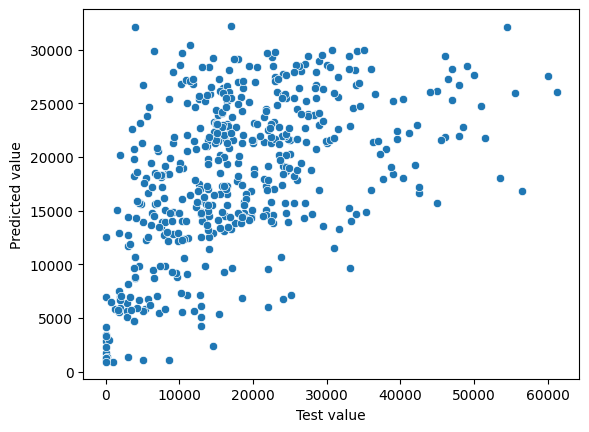

In [238]:
# 4
model = kNNRegression(n_neighbors=25)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)
graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

49847721982.09799


<Axes: xlabel='Test value', ylabel='Predicted value'>

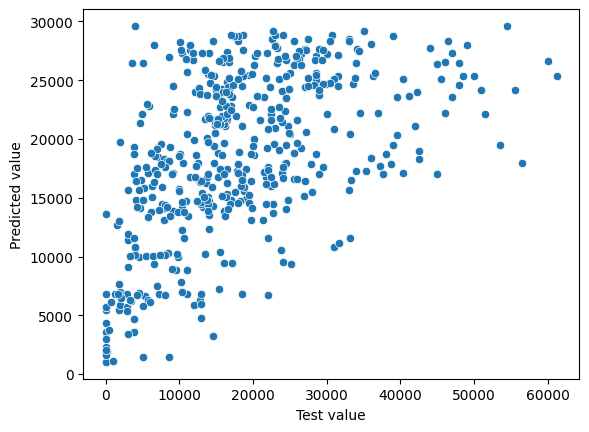

In [239]:
# 4
model = kNNRegression(n_neighbors=50)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)

graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

49135529480.4603


<Axes: xlabel='Test value', ylabel='Predicted value'>

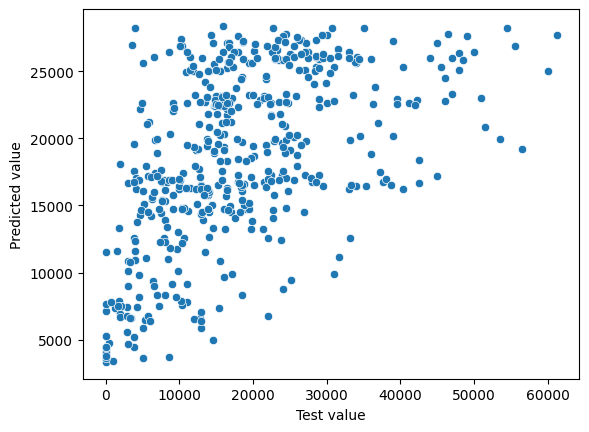

In [240]:
# 4
model = kNNRegression(n_neighbors=100)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)
graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

50238649457.106


<Axes: xlabel='Test value', ylabel='Predicted value'>

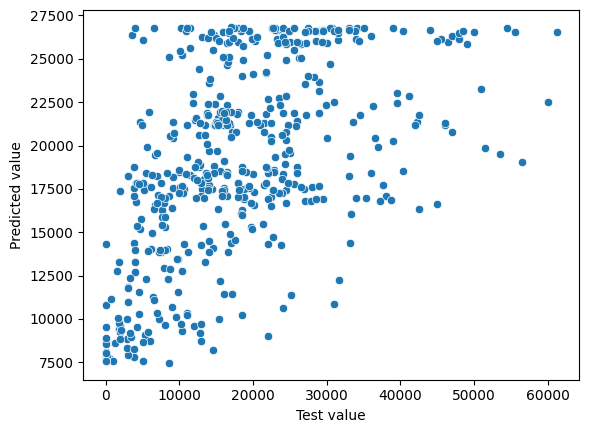

In [241]:
# 4
model = kNNRegression(n_neighbors=300)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test-y_hat)**2 )
print(sse)

graph_data = pd.DataFrame({"Test value": y_test, "Predicted value": y_hat})
sns.scatterplot(data=graph_data, x = "Test value", y = "Predicted value")

In [242]:
# 4
# As k increases, the SSE decreases until k = 100, then after that point the SSE increases. In terms of the graph, with smaller values of
# k like 3 or 10 the data are spread out. Then as k increases the data cluster more together, showing a more accurate model. Then, for k = 300
# the data spread again. There is also a weird almost line of values at the top of the graph for k = 300.

In [243]:
# 5
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE
SSE = SSE_test
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal K value: ", k_star)


Optimal K value:  [77]


In [244]:
# 6

# When k is very small the model is underfit, there are many values for k = 3 and k = 10 where the actual price of the car is much
# higher than the predicted value. This would suggest that our k is not big enough because the SSE is also high.
# As k increases towards its ideal value of 77, the error decreases. In the scatter plot we can see that shape of the data is more concentrated
# to one area. Between k = 100 and k = 50, the SSE is the lowest compared to the other k values.
# When k increases to 300, the model is now overfit. We can tell because the SSE jumps up again. Also the scatter plot
# is now more spread out and the model is less accurate as evidence by the sort of line of dots at the top of the graph.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [245]:
# 1

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
print(df0_125)

          x1        x2 group
0   0.781279  0.851498     a
1   1.042835  0.931282     a
2   1.144129  0.882494     a
3   0.968445  0.896508     a
4   1.122665  1.013608     a
..       ...       ...   ...
45  5.144996  2.890534     c
46  5.087773  3.014701     c
47  4.839512  2.880229     c
48  5.190288  2.764861     c
49  4.977505  3.022793     c

[150 rows x 3 columns]


<Axes: xlabel='x1', ylabel='x2'>

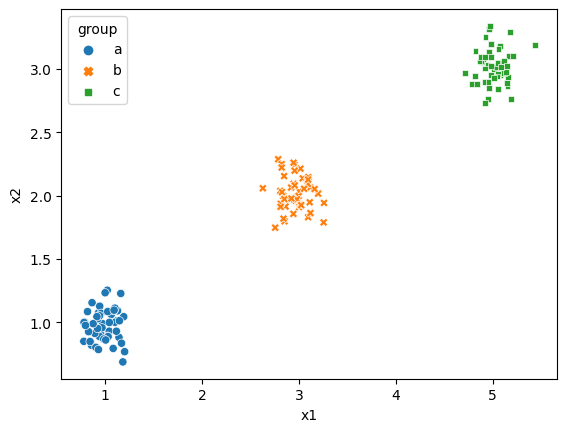

In [246]:
# 2
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

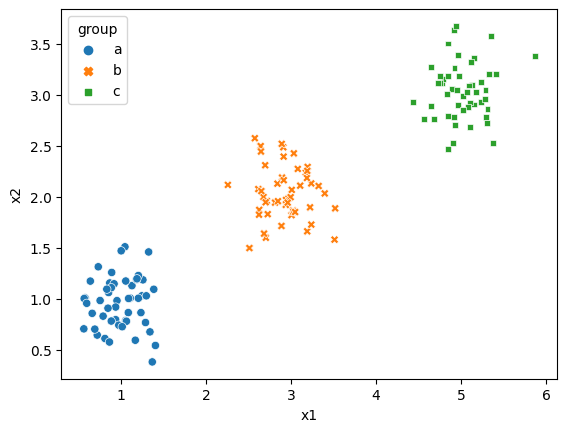

In [247]:
# 2
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

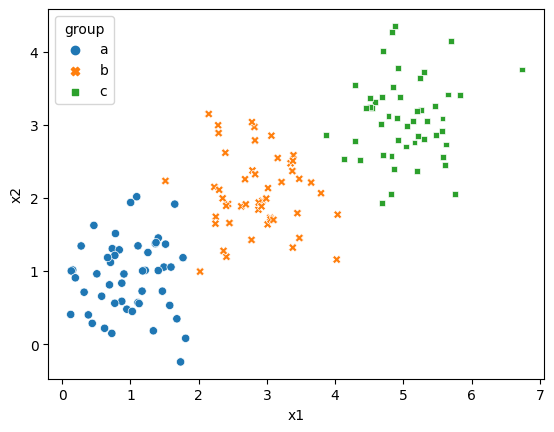

In [248]:
# 2
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

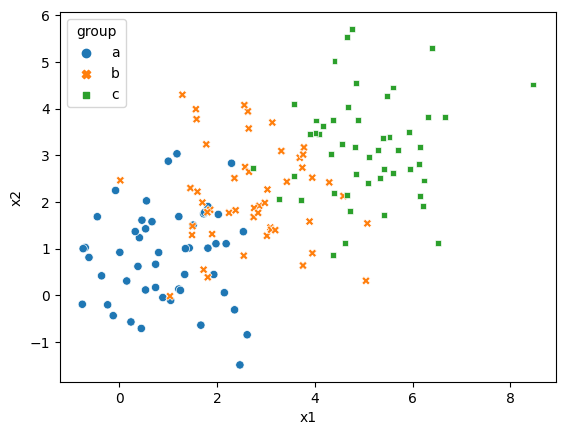

In [249]:
# 2
sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

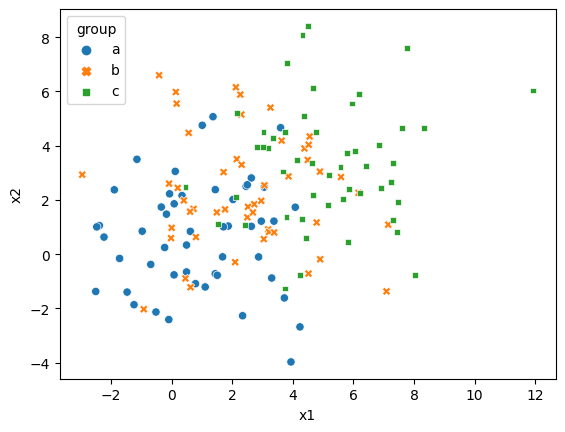

In [250]:
# 2
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group',style='group')

In [251]:
# 2
# As the noise increases the clusters become less and less visually distinct. With noise of 2, the graph basically looks like just one cluster
# With the least amount of the noise, the graph shows 3 very clear clusters that any one could pick out without the groups being
# shaded in different colors.

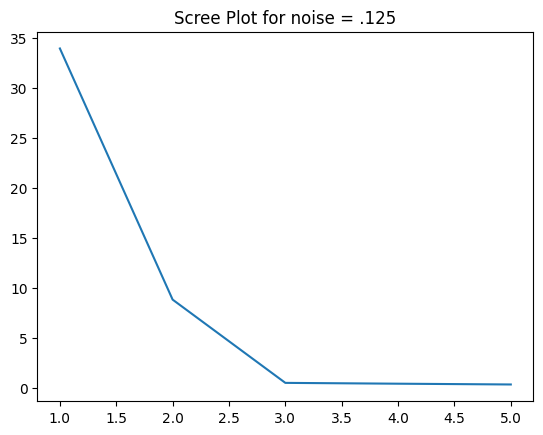

In [252]:
# 3
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
k_bar = 5
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot125 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot for noise = .125') # Create scree plot

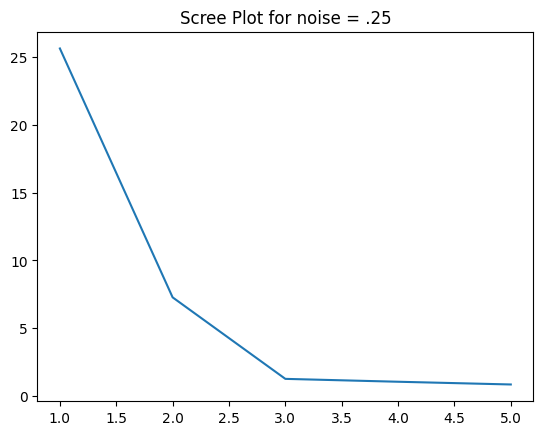

In [253]:
# 3
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
k_bar = 5
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot25 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot for noise = .25') # Create scree plot

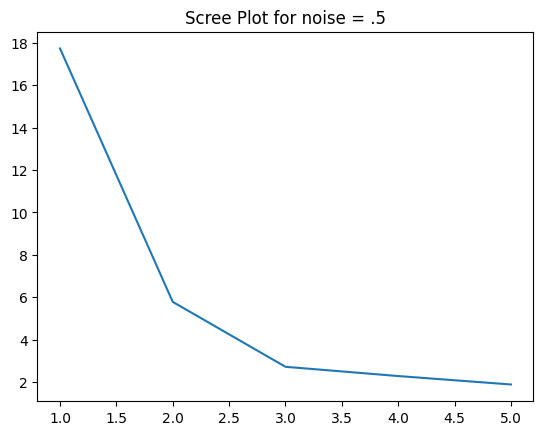

In [254]:
# 3
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
k_bar = 5
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot5 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot for noise = .5') # Create scree plot

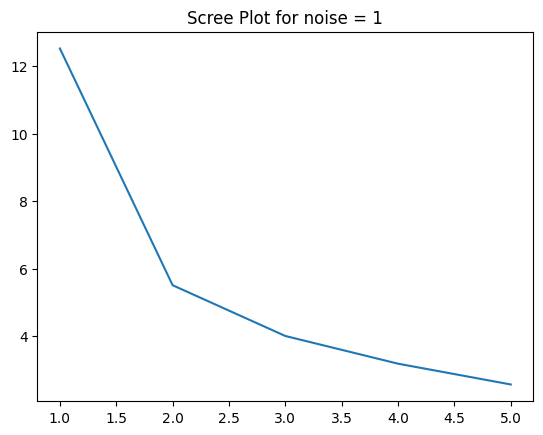

In [255]:
# 3
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
k_bar = 5
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot1 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot for noise = 1') # Create scree plot

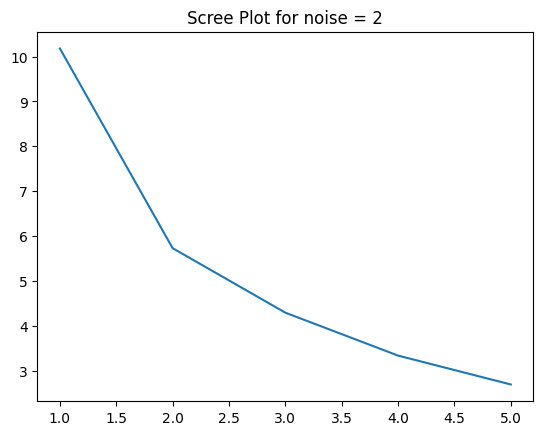

In [256]:
# 3
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)
k_bar = 5
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot2 = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot for noise = 2') # Create scree plot

In [257]:
# 3

# The elbow is the most distinct with the least amount of noise. When noise equals 0.125, there is a very clear drop off after 3 on the x-axis
# After this point, the line is almost flat showing adding more clusters would not significantly decrease the SSE. The elbow is still fairly
# distinct for noise = 0.25 and 0.5, but for noise = 1 and 2, the elbow on the scree plot is not significant. On the last plot shown, there
# is not point where the line appears to flatten out. The more noise there is, the harder it is to find an optimal k value.

In [258]:
# 4

# The intuition of the elbow on the Scree plot is that the x-axis shows potential k values. The slope of the line shows now much increasing k
# would lead to a smaller SSE. This is how we fine the ideal k value, because once the benefits to increasing k flatten out we have found
# our ideal k value. The elbow is this point because in an ideal skree graph, simliar to the first one above, the line makes an arm with the
# point being the elbow. In that graph, it is very easy to see the point where after if the line is almost flat falls at k = 3.